# Introduction

This is a project named **'Unicorn Startups Analysis'**, which is carried out by using Python programming language. The following sections for data analysis are covered in this project:
* Data preparation
* Data Cleaning
* Data Analysis
* Analysis Insights

This data has been proposed in the Kaggle platform under this [license](https://creativecommons.org/publicdomain/zero/1.0/)

"Unicorn" is a term used in the venture capital industry to describe a privately held startup company with a value of over USD 1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a seed-stage venture capital fund based in Palo Alto, California. It is worth noting that the company is not considered a unicorn if it is no longer venture-backed because it goes public or is acquired, or if its value falls below the USD 1 billion thresholds.


# Objective

The objective of this project is to reveal some insights about Unicorn Startups as the following:

* Determination of the most valuable companies and industries
* Segmentation of the overall market by share of each industry
* Revealing the list of top countries known as the birthplace of unicorns
* Yearly valuation comparison of Top 3 countries
* Analyzing growth trends in the overall market
* Figuring out the most successful investors by the number of unicorns


# 1. Data Preparation

This data is available on the Kaggle platform as a publicly available resource. The source is in CSV format with data updated till September 2022. The table contains 7 columns, which represents the feature of unicorn startups such as valuation (in USD billion), date of becoming a unicorn, geographical information such as country and city, the industry in which this company specializes, and name of investors. 

First of all, I will import the necessary libraries for this project:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sns.set(rc={'figure.figsize':(15,6.5)})

Now we can load our data for analysis:

In [2]:
unicorns = pd.read_csv('../input/unicorn-startups/unicorns till sep 2022.csv')
unicorns.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Let's look into the quick scan of the data:

In [3]:
unicorns.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [4]:
unicorns.info()
unicorns.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

As per the above output, we can see that there are null values for the 'Investors' column. In addition, let's check the 'industry' and 'country' columns if there is any data inaccuracy and duplications:

In [5]:
unicorns.Industry.value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [6]:
unicorns.Country.value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

In [7]:
unicorns.duplicated().value_counts()

False    1186
dtype: int64

There is observed inaccuracy in the data for the 'Industry' column for records between 'Artificial Intelligence' and 'Artificial intelligence' as well as misplacement of the data.

As per the initial exploration of the data, the following steps should be taken as the part of Data Cleaning process:
  * Renaming column names using Snake Case approach, as some columns contain unnecessary spaces
  * Converting the 'Valuation ($B)' column to float, and 'Date Joined' to datetime formats
  * Extracting year data from the 'Date Joined' column for better visualizations
  * Sorting out missing values in the 'investors' column and fixing misplacement of the data
  * Splitting multiple investors across multiple columns
  * Sorting out data inaccuracy in the 'Industry' column

# 2. Data Cleaning

We need to rename the column names by using Snake Case approach, in the following way:

In [8]:
unicorns.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
unicorns.columns

Index(['company', 'valuation_($b)', 'date_joined', 'country', 'city',
       'industry', 'investors'],
      dtype='object')

Now, let's remove the USD sign in the 'valuation_($b)' column and convert it to the float type, as well as convert the 'date_joined' column to datetime format:

In [9]:
unicorns['valuation_($b)'] = unicorns['valuation_($b)'].str.replace('$', '', regex=False).astype(float)
unicorns['year'] = pd.to_datetime(unicorns['date_joined']).dt.year
#unicorns['year'] = unicorns['date_joined'].dt.year
unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1186 non-null   object 
 1   valuation_($b)  1186 non-null   float64
 2   date_joined     1186 non-null   object 
 3   country         1186 non-null   object 
 4   city            1186 non-null   object 
 5   industry        1186 non-null   object 
 6   investors       1168 non-null   object 
 7   year            1186 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 74.2+ KB


As per the initial exploration, there are missing values in the 'investors' column:

In [10]:
unicorns[unicorns['investors'].isna()]

,company,valuation_($b),date_joined,country,city,industry,investors,year
10,FTX,32.00,7/20/2021,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN,2021
242,HyalRoute,3.50,5/26/2020,Singapore,Mobile & telecommunications,Kuang-Chi,NaN,2020
316,Amber Group,3.00,6/21/2021,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN,2021
346,Moglix,2.60,5/17/2021,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN,2021
371,Coda Payments,2.50,4/15/2022,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN,2022
482,Advance Intelligence Group,2.00,9/23/2021,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN,2021
495,Trax,2.00,7/22/2019,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN,2019
865,Carousell,1.10,9/15/2021,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN,2021
917,LinkSure Network,1.00,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN,2015
941,WeLab,1.00,11/8/2017,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN,2017


As we can see from the above output, there is shifting in the data leading to incorrect information, to be more precise in all records except for the 'LinkSure Network', the country and city should be the same because the location is a city-state. Thus, there is a shift of the data to the left and we need to return the investors' data to the 'investors' column, as well as industry information to the 'industry' column. In the end, the 'city' column data should match with the 'country' column (because of the city-state feature).

In the beginning, it's better to fix the missing value issue related to the company's LinkSure Network'. We can fill the 'investors' column for this unicorn as per the following [source](https://www.cbinsights.com/company/linksure-network/financials)

In [11]:
unicorns.loc[unicorns['company'] == 'LinkSure Network', 'investors']='Haitong Kaiyuan Investment, Northern Light Venture Capita'

Now, we can fix the misplacement of the data:

In [12]:
unicorns['investors'].fillna(unicorns['industry'], inplace = True)
unicorns.loc[unicorns['investors'] == unicorns['industry'], 'industry'] = unicorns['city']
unicorns.loc[unicorns['city'] == unicorns['industry'], 'city'] = unicorns['country']

It is better to split the multiple investors across multiple columns:

In [13]:
unicorns[['investor_1', 'investor_2', 'investor_3', 'investor_4']] = unicorns['investors'].str.split(', ', expand=True)
unicorns.drop(columns = 'investors', inplace=True)

Finally, there is the inaccuracy of data between 'Artificial Intelligence' and 'Artificial intelligence' in the 'industry' column, which can be fixed in the following way:

In [14]:
unicorns['industry'] = unicorns['industry'].str.replace('Artificial Intelligence', 'Artificial intelligence')
unicorns.industry.value_counts()

Fintech                                246
Internet software & services           226
E-commerce & direct-to-consumer        107
Health                                  94
Artificial intelligence                 87
Supply chain, logistics, & delivery     66
Other                                   65
Cybersecurity                           58
Data management & analytics             45
Auto & transportation                   40
Hardware                                38
Mobile & telecommunications             38
Edtech                                  32
Consumer & retail                       28
Travel                                  14
Internet                                 2
Name: industry, dtype: int64

Thus, we have fully cleaned our data for further analysis:

In [15]:
unicorns.head()

,company,valuation_($b),date_joined,country,city,industry,year,investor_1,investor_2,investor_3,investor_4
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,2014,Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


# 3. Data Analysis

In this Analysis, we will identify the main insights from this data such as the determination of most valuable companies and industries, segmentation of the overall market by share of each industry, revealing the list of top countries known as the birthplace of unicorns, yearly valuation comparison of Top 3 countries, analyzing growth trends in the overall market, figuring out most successful investors by a number of unicorns.

### 3.1 Top companies and industries by valuation

First of all, let's identify the top 10 valuable companies and industries accordingly:


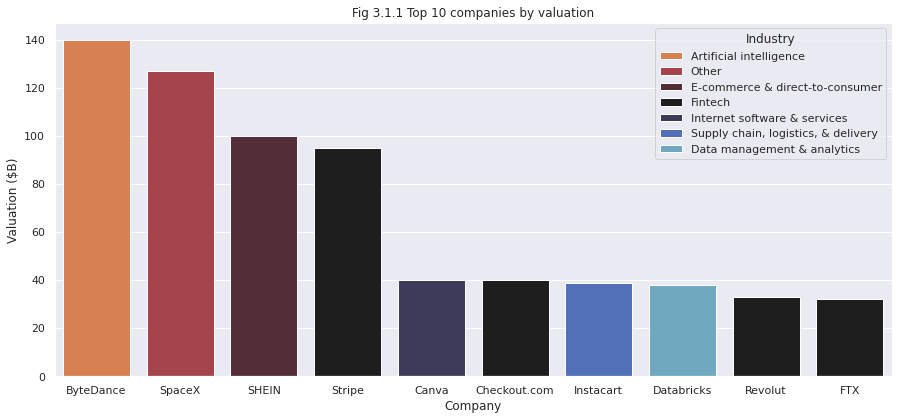

In [16]:
top_companies = unicorns.sort_values(by = 'valuation_($b)', ascending=False).head(10)

fig = sns.barplot(data = top_companies, x = 'company', y = 'valuation_($b)',
                  hue = 'industry', dodge=False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels())
labels = fig.set(xlabel ="Company", ylabel = "Valuation ($B)", title ='Fig 3.1.1 Top 10 companies by valuation')
legend = plt.legend(title='Industry', loc='upper right')

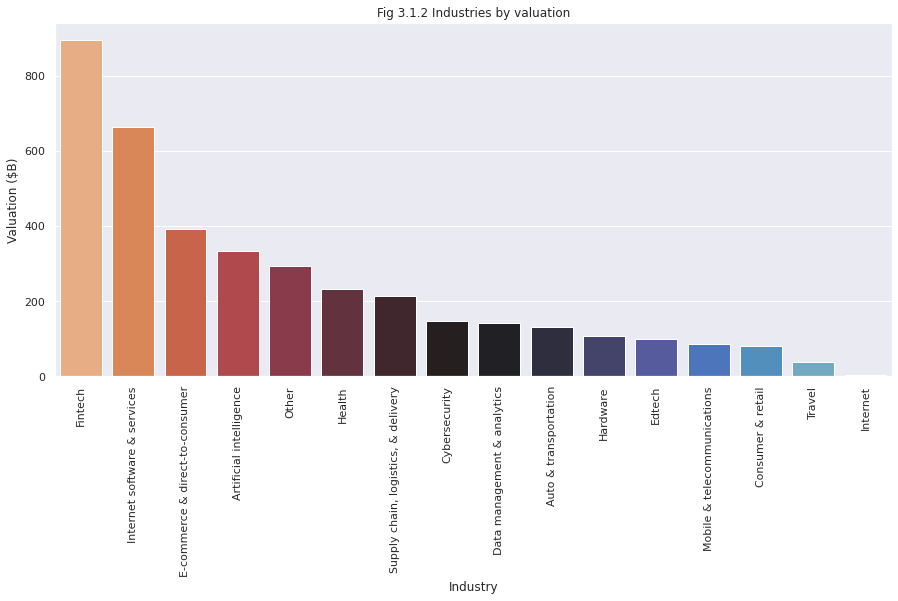

In [17]:
top_industries = unicorns.groupby(by ='industry').sum().sort_values(by ='valuation_($b)', ascending=False)

fig = sns.barplot(data = top_industries, x = top_industries.index, y = 'valuation_($b)',
                  dodge=False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
labels = fig.set(xlabel ="Industry", ylabel = "Valuation ($B)", title ='Fig 3.1.2 Industries by valuation')

### 3.2 Segmentation of the market by industries

Now, let's look into the segmentation of the overall market by the share of each industry:

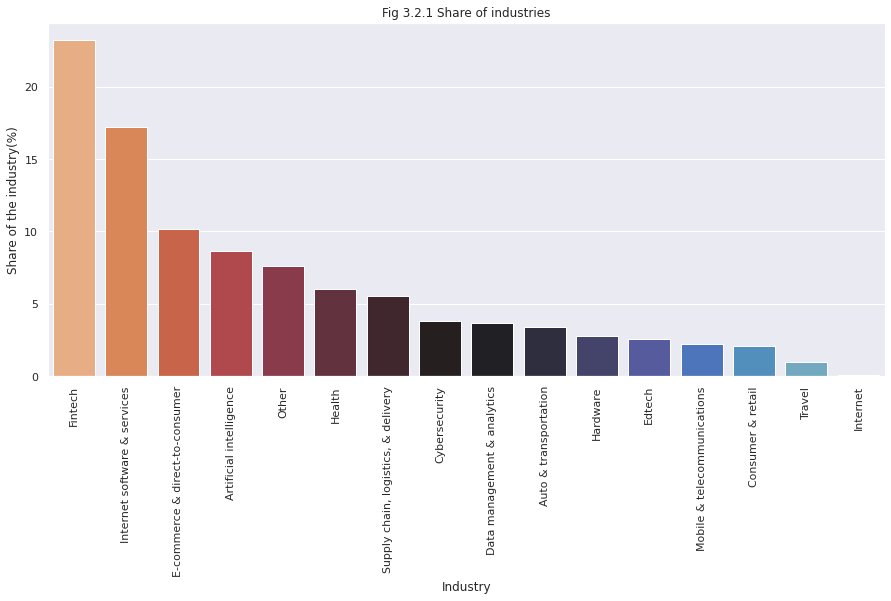

In [18]:
industry_share = top_industries['valuation_($b)'].apply(lambda x: (x/top_industries.sum())*100).round(2)

fig = sns.barplot(data = industry_share, x = industry_share.index, y = 'valuation_($b)',
                   dodge = False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
labels = fig.set(xlabel ="Industry", ylabel = "Share of the industry(%)", title ='Fig 3.2.1 Share of industries')

### 3.3 Country-wise analysis

Let's look into the top 10 countries by valuation known as birthplace of unicorns:

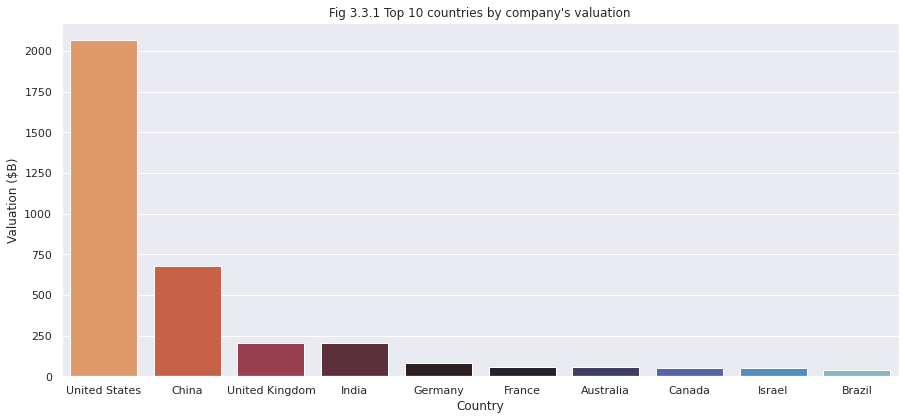

In [19]:
top_countries = unicorns.groupby(by = 'country').sum().sort_values(by ='valuation_($b)', ascending=False).head(10)

fig = sns.barplot(data = top_countries, x = top_countries.index, y = 'valuation_($b)',
                  dodge = False, palette= 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels())
labels = fig.set(xlabel ="Country", ylabel = "Valuation ($B)", title ="Fig 3.3.1 Top 10 countries by company's valuation")

We can also analyse countries by the overall number of unicorns:

In [20]:
countries_count = unicorns['country'].value_counts().head(10)
countries_count = pd.DataFrame(countries_count)
countries_count.rename({'country':'counts'}, axis=1, inplace=True)
countries_count

,counts
United States,636
China,174
India,70
United Kingdom,46
Germany,29
France,24
Israel,22
Canada,19
Brazil,17
South Korea,17


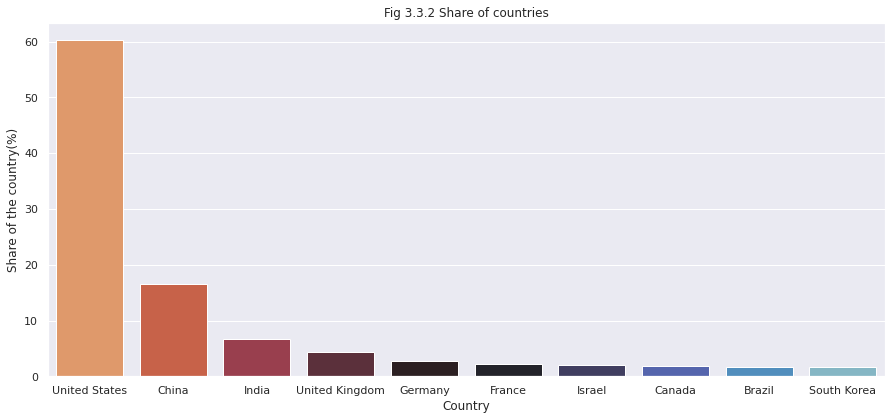

In [21]:
countries_share = countries_count['counts'].apply(lambda x: (x/countries_count.counts.sum())*100).round(2)
countries_share = pd.DataFrame(countries_share)
fig = sns.barplot(data = countries_share, x = countries_share.index, y = 'counts',
                  dodge=False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels())
labels = fig.set(xlabel ="Country", ylabel = "Share of the country(%)", title ="Fig 3.3.2 Share of countries")

### 3.4 Comparing Top 3 Countries

From the above analysis, we can conclude that the top 3 countries by the number of unicorns are the United States, China, and India. Since the data is covering the period only till September 2022, we will filter out this year for a more objective comparison. Let's compare these countries by yearly valuation:

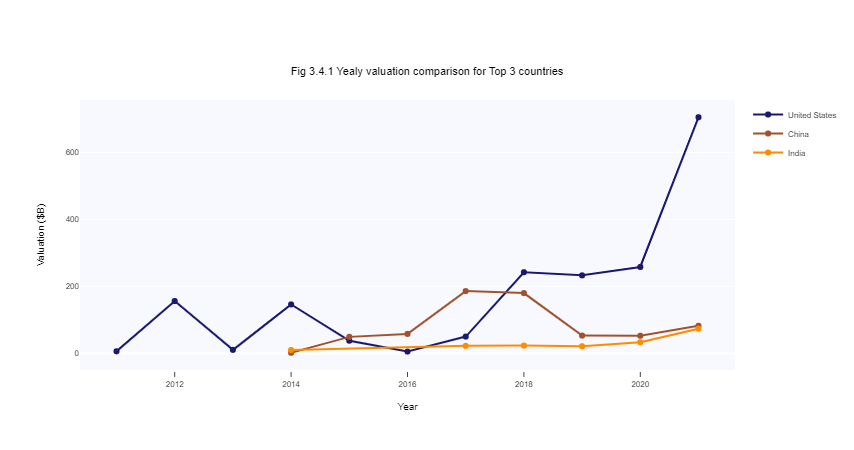

In [22]:
unicorns_us = unicorns[(unicorns['country'] == 'United States') & (unicorns['year'] < 2022)]
unicorns_china = unicorns[(unicorns['country'] == 'China') & (unicorns['year'] < 2022)]
unicorns_india = unicorns[(unicorns['country'] == 'India') & (unicorns['year'] < 2022)]

value_us = unicorns_us.groupby('year')['valuation_($b)'].sum().reset_index()
value_china = unicorns_china.groupby('year')['valuation_($b)'].sum().reset_index()
value_india = unicorns_india.groupby('year')['valuation_($b)'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=value_us['year'], y=value_us['valuation_($b)'],
                         mode='lines+markers', name='United States', line = dict(color = 'midnightblue')))
fig.add_trace(go.Scatter(x=value_china['year'], y=value_china['valuation_($b)'],
                         mode='lines+markers', name='China', line = dict(color = 'sienna')))
fig.add_trace(go.Scatter(x=value_india['year'], y=value_india['valuation_($b)'],
                         mode='lines+markers', name='India', line = dict(color = 'darkorange')))

fig.update_layout(
    title = 'Fig 3.4.1 Yealy valuation comparison for Top 3 countries',
    title_x = 0.5,
    title_y = 0.85,
    xaxis_title = 'Year',
    yaxis_title = 'Valuation ($B)',
    xaxis = dict(
                 showline = True,
                 showgrid = False,
                 showticklabels = True,
                 linewidth = 2,
                 ticks = 'outside'),
    font=dict(
              family="sans-serif",
              size=8,
              color='black'),
    yaxis = dict(
                 showgrid = True,
                 showticklabels=True),
    plot_bgcolor='ghostwhite')  

### 3.5 Analyzing unicorns' growth

Firstly, let's look into the distribution of unicorns on yearly basis:

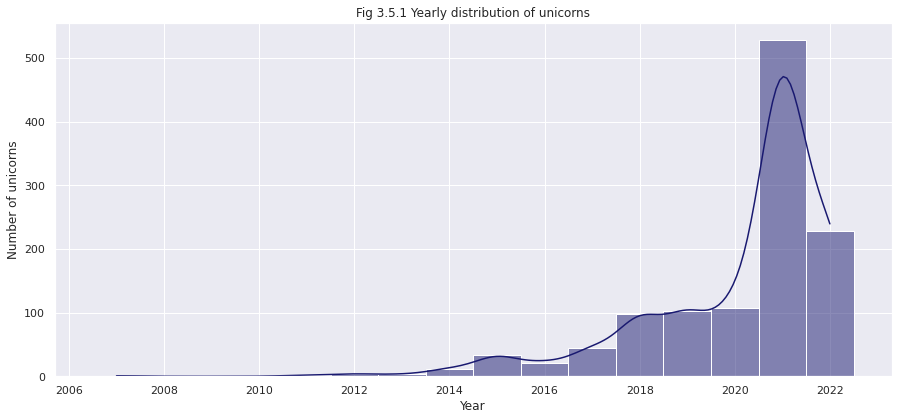

In [23]:
fig = sns.histplot(data = unicorns, x = 'year', discrete =True, kde =True, color = 'midnightblue')
labels = fig.set(xlabel ="Year", ylabel = "Number of unicorns", title ="Fig 3.5.1 Yearly distribution of unicorns")

Let's figure out the most growing industries among unicorns for the last 5 years:

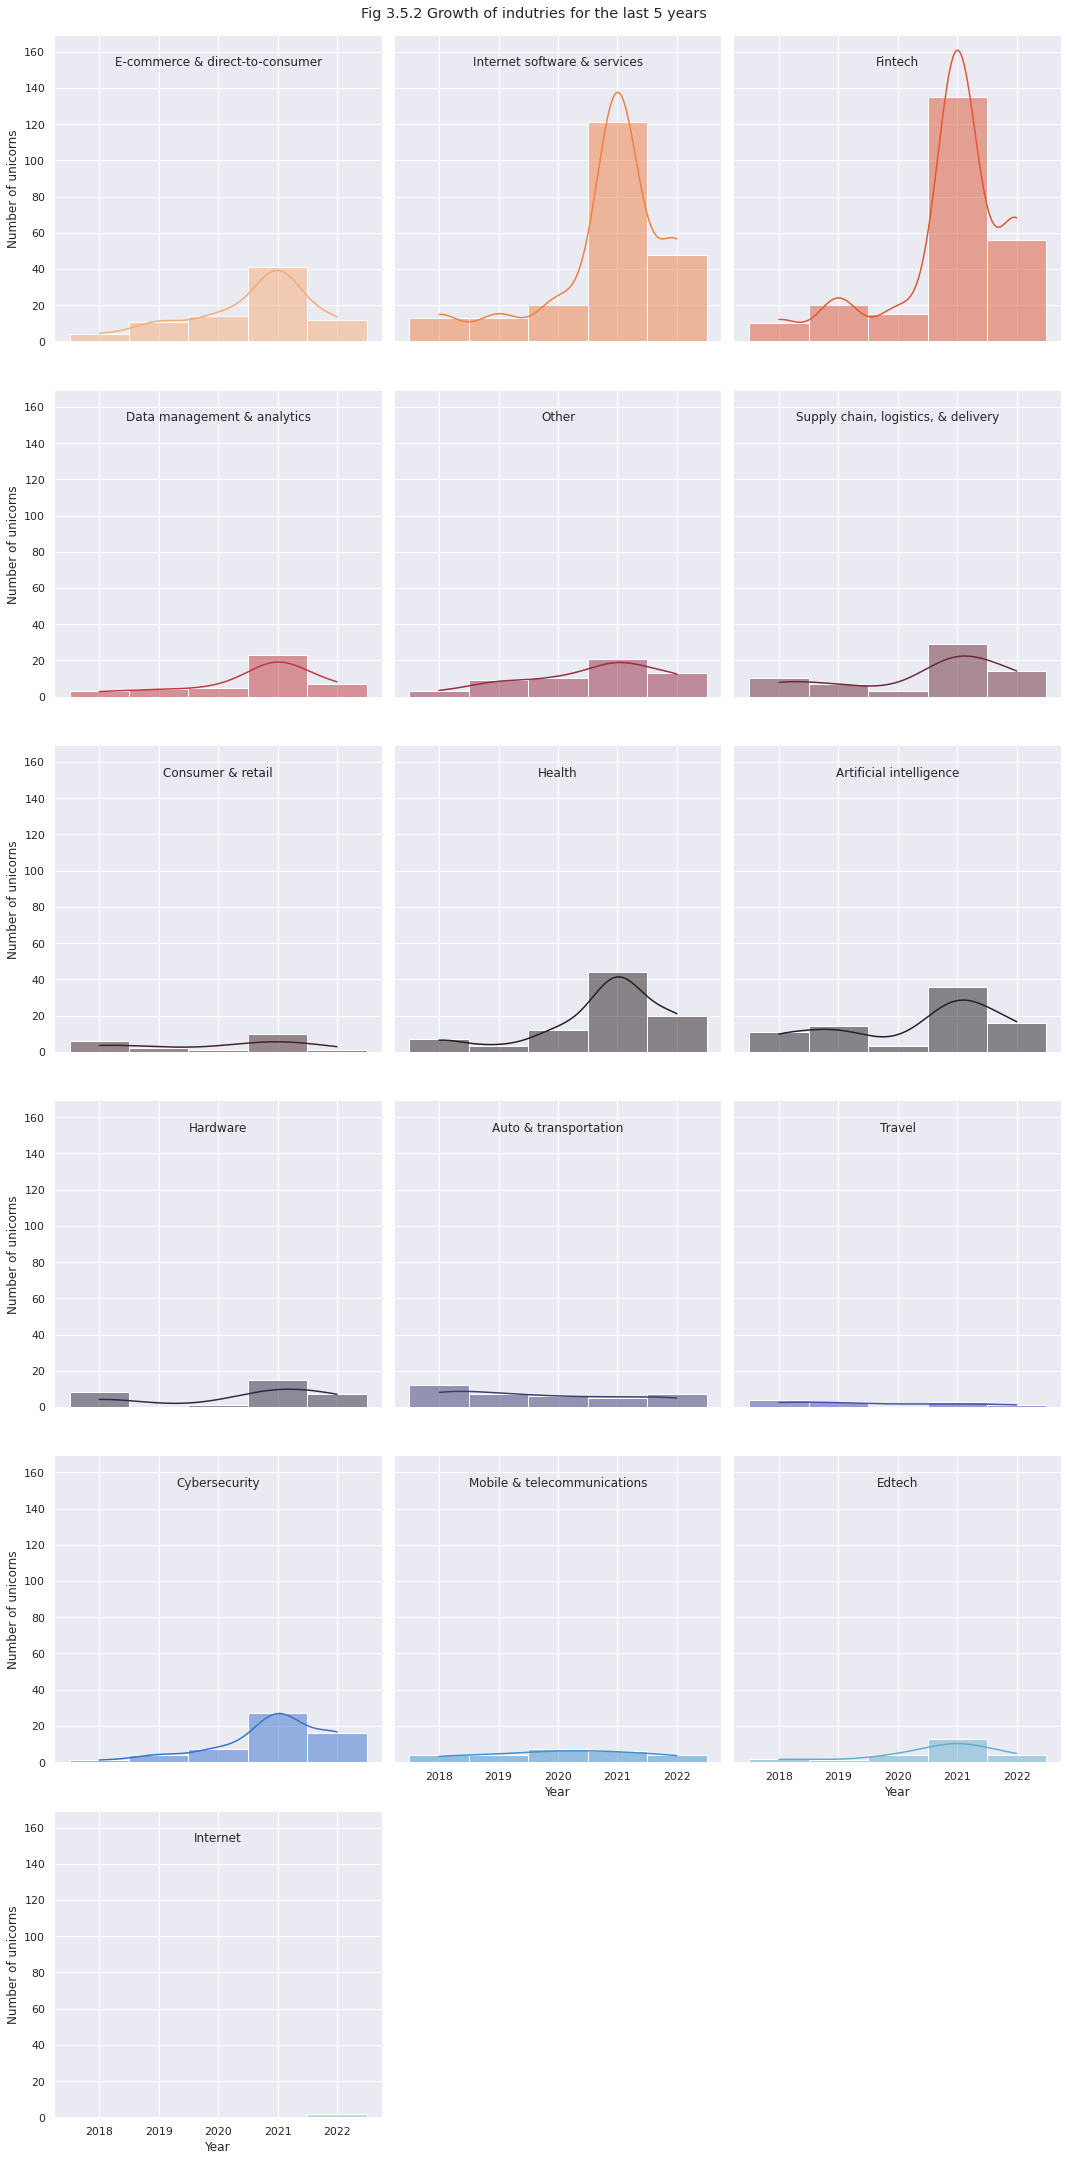

In [24]:
unicorns_2017 = unicorns[unicorns['year'] > 2017]
fig = sns.displot(data = unicorns_2017, x = 'year', hue = 'industry', kde=True,
                  discrete = True, palette = 'icefire_r', legend = False, height=5, 
                  col = 'industry',col_wrap = 3)
labels = fig.set(xlabel ="Year", ylabel = "Number of unicorns")
fig.fig.suptitle('Fig 3.5.2 Growth of indutries for the last 5 years', y = 1)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=True)
fig.set_titles(size=12, pad=-30, row_template = '{row_name}', col_template = '{col_name}')

Finally, let's look into the birth and growth of companies along the years and segmented by industries:

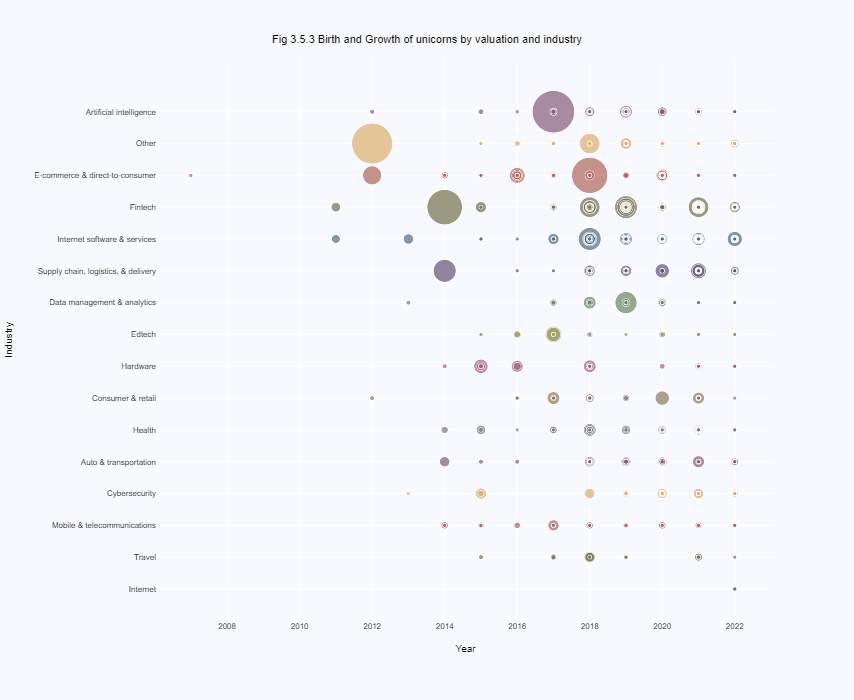

In [25]:
fig = px.scatter(unicorns,
                 x = 'year',
                 y = 'industry',
                 size = 'valuation_($b)',
                 color = 'industry',
                 hover_name = 'company',
                 size_max  = 30,
                 color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(
                  title = 'Fig 3.5.3 Birth and Growth of unicorns by valuation and industry',
                  title_x = 0.5,
                  title_y = 0.95,
                  xaxis_title = 'Year',
                  yaxis_title = 'Industry',
                  showlegend = False,
                  paper_bgcolor = 'ghostwhite',
                  plot_bgcolor = 'ghostwhite',
                  font=dict(
                            family="sans-serif",
                            size=8,
                            color='black'),
                  width = 800,
                  height = 700,
                  hovermode = 'closest')
fig.update_yaxes(visible=True)

### 3.6 Analyzing Investors

Finally, let's understand which investors are most successful in their decisions  in terms of number of unicorns:

In [26]:
investors = pd.concat([unicorns['investor_1'],unicorns['investor_2'],
                       unicorns['investor_3'],unicorns['investor_4']],axis = 0)
investors.dropna(inplace=True)
investors.value_counts().nlargest(10)

Accel                          63
Andreessen Horowitz            59
Tiger Global Management        57
Insight Partners               54
Sequoia Capital                53
Sequoia Capital China          48
General Catalyst               40
Lightspeed Venture Partners    39
SoftBank Group                 35
Index Ventures                 33
dtype: int64

# 4. Analysis Insights

Thus, by considering all the analysis carried out above and by referring to the created visualizations accordingly, the following insights can be emphasized:

  * By looking into the top 10 companies by valuation (**Fig 3.1.1**), we can reveal that [*'ByteDance'*](https://www.crunchbase.com/organization/bytedance) is leading with a valuation of around **USD 140B**, while it is being followed by [*'SpaceX'*](https://www.crunchbase.com/organization/space-exploration-technologies) (**USD 130B**). The third most valuable company is [*'SHEIN'*](https://www.crunchbase.com/organization/shein-b79e) (**USD 100B**), which is having little difference in valuation from [*'Stripe'*](https://www.crunchbase.com/organization/stripe) (**USD 95B**). 
  
  * By referring to the industry-wise valuation (**Fig 3.1.2**), it is obvious that most of the unicorns are from the *'Fintech'* industry, with an aggregate valuation of around **USD 900B**. The second most valuable industry is *'Internet Software & Services'*, which is followed by *'E-commerce & Direct-to-consumer'* and *'Artificial Intelligence'* sectors respectively. For more detailed insight, we calculated the share of each industry in the overall unicorn market (**Fig 3.2.1**). Thus, it is worth noting that the *'Fintech'* sector is covering almost **~25%** of the whole market, while *'Internet Software & Services'* is controlling around **~17%** and *'E-commerce & Direct-to-consumer'* **~10%** of the market. The rest of the shares are distributed between other sectors starting from *'Artificial Intelligence'* and ending with the least popular sector *'Internet'*.
  
  * In order to understand the trend of most successful countries as birthplaces for unicorns, we decided to plot aggregate the valuation of unicorns in a country-wise manner (**Fig 3.3.1**, **Fig 3.3.2**). As per the output, the *United States* is confidently leading the global market with an aggregate valuation of around **USD 2, 000B**, currently being a base for **636** companies with a global market share of **~60%**. It is followed by *China* (**USD 700B** valuation, **174** companies, **~16%** share) and *India* (**USD 240B** valuation, **70** companies, **~6%** share). It is worth noting, that though the aggregate valuation of *India* and the *United Kingdom* is almost the same, *India* is leading by the overall number of unicorns. To conclude, other countries are controlling the rest of the market with a total share of around **~18%**. 
  
  * In addition, we analyzed the country-wise growth of the companies' valuation over the years for the *United States*, *China*, and *India* (**Fig 3.4.1**). As per the plot, we can observe that the growth in the valuation of unicorns in the *United States* starts in early **2011** (**USD 5.7B**) with some fluctuations and further dropped over the period reaching a minimum in **2016** (**USD 5B**). There is dramatic growth for this parameter starting from **2016** with a slight plateau from **2018** to **2020** (around **USD 240B**) and followed by skyrocketing in **2021** (post-pandemic period) by reaching its maximum of **USD 705.5B**. Regarding valuation growth in *China*, we can state that its growth is from **2014** to **2017**, reaching its up-to-date maximum aggregate valuation of **USD 185.8B**, but this trend is reversed for the further period till **2020** with a slight rise in **2021** (**USD 82.0B**). In the case of *India*, unicorns' aggregate valuation is more stable in comparison with the *United States* and *China* and shows a steady rise over the whole period from **2014** to **2021** by reaching its maximum of **USD 73.4B** in **2021**.
  
  * In order to understand the growth of unicorns over the years, we can look into **Fig 3.5.1**. As per the obtained visualization, the number of unicorns is increasing globally since early **2007** with more steep growth in **2021** with around **550** new unicorns joined to the market.
  
  * By looking into the growth of industries over the last 5 years (**Fig 3.5.2**), we can observe that industries known as *'Fintech'* and *'Internet Software & Services'* are experiencing dramatic growth in the years **2021** and **2022**. Other industries are showing a more stable growth trend reaching a maximum in **2021** in most cases. In addition, as per another growth visualization (**Fig 3.5.3**), it is can be revealed that **2018** was the most successful year for unicorns birth in terms of valuation mostly related to industries *'E-commerce & Direct-to-consumer'*, *'Fintech'*, and *'Internet Software & Services'*.
  
  * Finally, as per the analysis of the investors' data, we can conclude that [*'Accel'*](https://www.crunchbase.com/organization/accel) is the most successful company by investing in **63** unicorns so far. It is being followed in the list by [*'Andreessen Horowitz'*](https://www.crunchbase.com/organization/andreessen-horowitz) and [*'Tiger Global Management'*](https://www.crunchbase.com/organization/tiger-global) with **59** and **57** unicorns respectively. An interesting fact is that 8 out of the top 10 successful investing companies are based in the *United States*, the other 2 known as [*'SoftBank Group'*](https://www.crunchbase.com/organization/softbank-group-international) and [*'Sequoia Capital China'*](https://www.crunchbase.com/organization/sequoia-capital-china) are based in *Japan* and *China* accordingly.

# Acknowledgment

**Thanks for reading!**

I would like to express my gratitude to **Python** communities for the great forums and documentation, which supported me in choosing the right tools and functions for this project.